In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [2]:
df=pd.read_csv('./Dataset/Weather_History.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

In [4]:
df['Datetime']=pd.to_datetime(df['Formatted Date'],utc=True)
df_new=df[['Datetime','Temperature (C)']]
df_new=df_new.rename({'Temperature (C)':'Temp'},axis=1)
df_new=df_new.sort_values('Datetime',ascending=True,axis=0)
df_new=df_new.reset_index(drop=True)
df_new.head()

,Datetime,Temp
0,2005-12-31 23:00:00+00:00,0.577778
1,2006-01-01 00:00:00+00:00,1.161111
2,2006-01-01 01:00:00+00:00,1.666667
3,2006-01-01 02:00:00+00:00,1.711111
4,2006-01-01 03:00:00+00:00,1.183333


In [5]:
df_new.iloc[24]

Datetime    2006-01-01 23:00:00+00:00
Temp                         5.422222
Name: 24, dtype: object

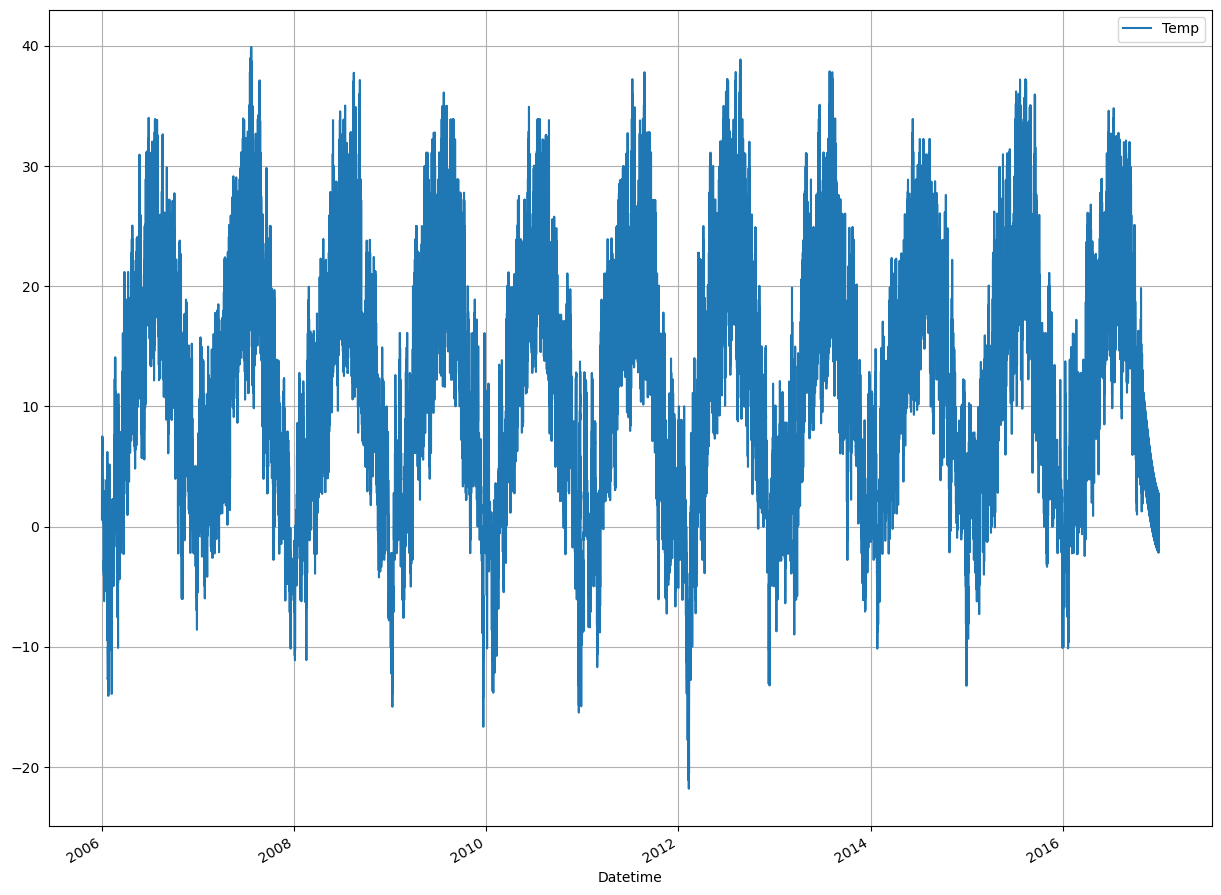

In [6]:
fig, ax = plt.subplots(figsize = (15,12))
df_new.plot(x='Datetime',y='Temp',ax=ax)
ax.grid()

In [7]:
df_new.shape[0]//24

4018

In [8]:
y_rng=np.arange(24,df.shape[0],24)
y_rng

array([   24,    48,    72, ..., 96384, 96408, 96432])

In [9]:
y=df_new.iloc[y_rng,:]
y

,Datetime,Temp
24,2006-01-01 23:00:00+00:00,5.422222
48,2006-01-02 23:00:00+00:00,1.694444
72,2006-01-03 23:00:00+00:00,2.200000
96,2006-01-04 23:00:00+00:00,1.666667
120,2006-01-05 23:00:00+00:00,1.805556
...,...,...
96336,2016-12-27 02:00:00+00:00,-1.627778
96360,2016-12-28 02:00:00+00:00,-1.677778
96384,2016-12-29 02:00:00+00:00,-1.727778
96408,2016-12-30 02:00:00+00:00,-1.777778


In [10]:
Y=y.drop('Datetime',axis=1)
Y

,Temp
24,5.422222
48,1.694444
72,2.200000
96,1.666667
120,1.805556
...,...
96336,-1.627778
96360,-1.677778
96384,-1.727778
96408,-1.777778


In [11]:
df_new.iloc[22,:]

Datetime    2006-01-01 21:00:00+00:00
Temp                         5.472222
Name: 22, dtype: object

In [12]:
X_new=df_new.iloc[:len(Y)*24]
# X_new[:26]
X_new=np.reshape(X_new['Temp'].values,(len(Y),24,1))
X=X_new
# X_new.shape
# X_new[2,:]
# X=X_new[:,:23]
# X_new.shape
# X_new

In [13]:
Y.shape,X.shape

((4018, 1), (4018, 24, 1))

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [15]:
input_shape=(24,1)
h_units=64

model=tf.keras.models.Sequential()
model.add(LSTM(units=h_units,input_shape=input_shape,activation='sigmoid'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])

C:\Users\adity\OneDrive - IIT Delhi\Anaconda installation\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(X_train,y_train,epochs=20,verbose=1,batch_size=32,validation_split=0.15)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 104.9846 - root_mean_squared_error: 10.2039 - val_loss: 41.7397 - val_root_mean_squared_error: 6.4606
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 35.3610 - root_mean_squared_error: 5.9277 - val_loss: 18.8314 - val_root_mean_squared_error: 4.3395
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 15.6680 - root_mean_squared_error: 3.9535 - val_loss: 9.7707 - val_root_mean_squared_error: 3.1258
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.3539 - root_mean_squared_error: 2.8890 - val_loss: 5.8959 - val_root_mean_squared_error: 2.4282
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.9682 - root_mean_squared_error: 2.2275 - val_loss: 3.9694 - val_root_mean_squared_error: 1.9923
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.7343 - root_mean_squared_error: 1.9259 - val_loss: 2.9101 - val_root_mean_squared_error: 1.7059
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - l

In [18]:
hs=pd.DataFrame(history.history)
hs.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,78.647552,8.868345,41.739677,6.460625
1,28.607178,5.348568,18.831411,4.339518
2,13.203881,3.633714,9.770665,3.125806
3,7.377627,2.716179,5.895934,2.428154
4,4.566246,2.136878,3.969355,1.992324


Text(0, 0.5, 'RMSE')

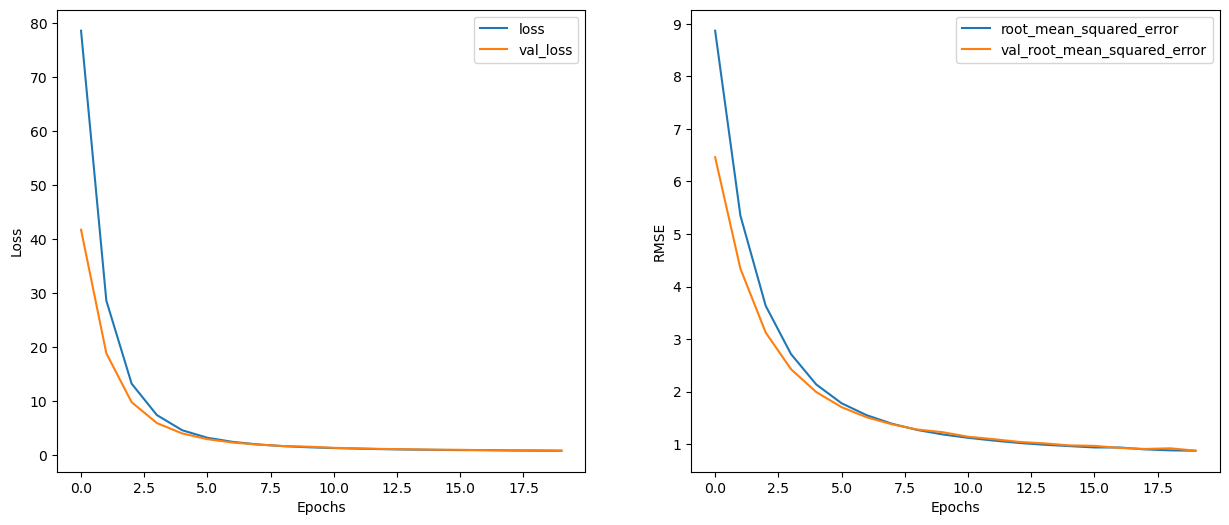

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax0=ax[0]
hs.plot(y=['loss','val_loss'],ax=ax0)
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')

ax1=ax[1]
hs.plot(y = ['root_mean_squared_error', 'val_root_mean_squared_error'], ax = ax1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('RMSE')

In [20]:
results=model.evaluate(X_test,y_test,verbose=1)
print(f'test loss {results[0]} test acc {results[1]}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6708 - root_mean_squared_error: 0.8168 
test loss 0.6997136473655701 test acc 0.8364889025688171


In [21]:
test_rmse = results[1]
percentage_accuracy = 100 * (1 - test_rmse / np.mean(y_test))

# Assuming percentage_accuracy is a Series with one value
percentage_accuracy_value = percentage_accuracy.iloc[0] if isinstance(percentage_accuracy, pd.Series) else percentage_accuracy

print(f'Percentage Accuracy: {percentage_accuracy_value:.2f}%')

Percentage Accuracy: 90.48%


C:\Users\adity\OneDrive - IIT Delhi\Anaconda installation\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [22]:
y_pred=model.predict(X)
res_df=y.copy()
res_df['predicted']=y_pred
res_df.head()

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


,Datetime,Temp,predicted
24,2006-01-01 23:00:00+00:00,5.422222,5.193138
48,2006-01-02 23:00:00+00:00,1.694444,1.579687
72,2006-01-03 23:00:00+00:00,2.200000,2.243407
96,2006-01-04 23:00:00+00:00,1.666667,1.653047
120,2006-01-05 23:00:00+00:00,1.805556,2.237336


Text(0, 0.5, 'Temperature (C)')

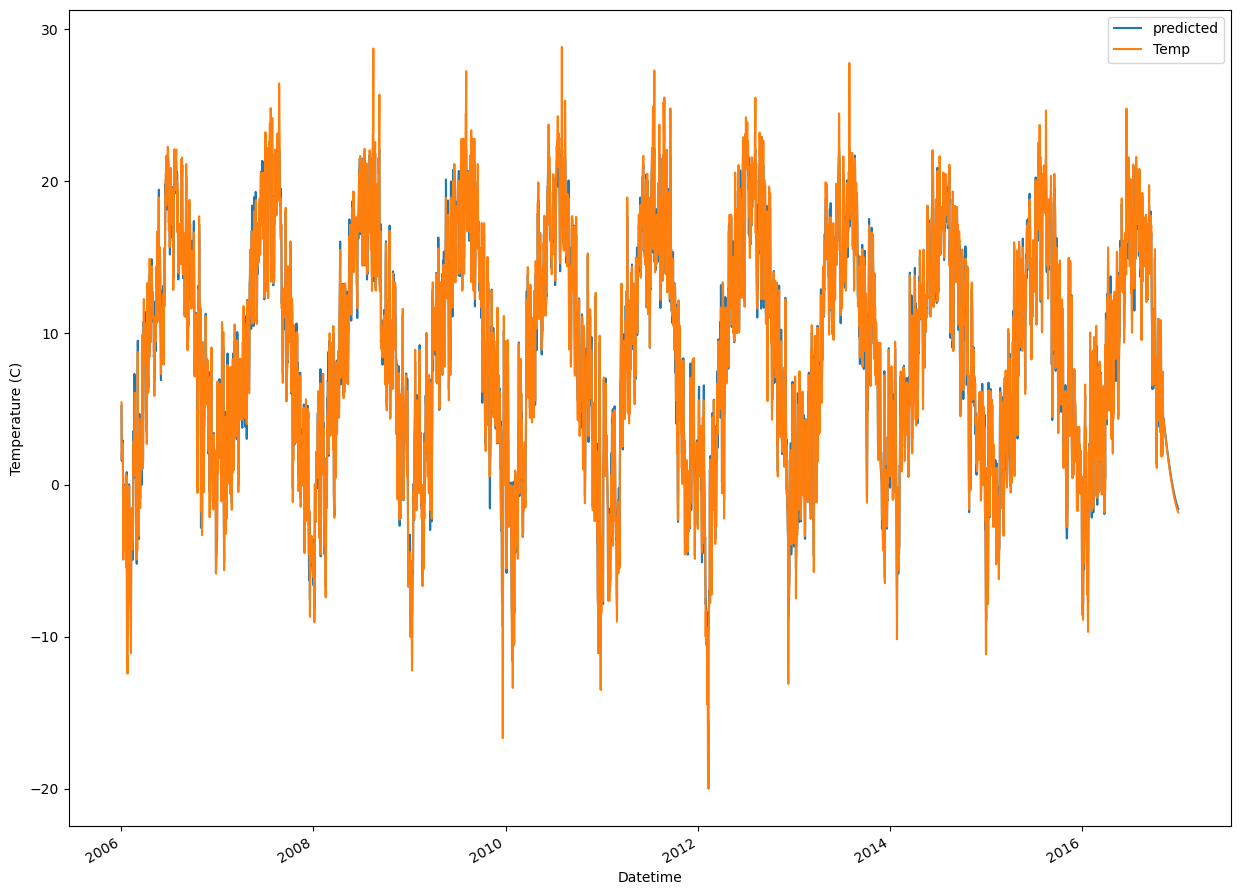

In [23]:
fig,ax=plt.subplots(1,figsize=(15,12))
res_df.plot(y=['predicted','Temp'],x='Datetime',ax=ax)
ax.set_ylabel('Temperature (C)')